In [1]:
import pandas as pd
from matplotlib import pyplot as plt

data='../../../data/meth/'
ez_='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE94nnn/GSE94300/suppl/GSE94300_E14Ezh2_MAnorm_unbiased.bed.gz'

ds={
'd0':'https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2794nnn/GSM2794005/suppl/GSM2794005_WGBS_MEF.tab.gz',
'd1':'https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2794nnn/GSM2794006/suppl/GSM2794006_WGBS_Day1.tab.gz',
'd2':'https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2794nnn/GSM2794007/suppl/GSM2794007_WGBS_Day2.tab.gz',
'd3':'https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2794nnn/GSM2794008/suppl/GSM2794008_WGBS_Day3.tab.gz',
'd4':'https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2794nnn/GSM2794009/suppl/GSM2794009_WGBS_Day4.tab.gz',
'd5':'https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2794nnn/GSM2794010/suppl/GSM2794010_WGBS_Day5.tab.gz',
'd6':'https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2794nnn/GSM2794011/suppl/GSM2794011_WGBS_Day6.tab.gz',
'd7':'https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2794nnn/GSM2794012/suppl/GSM2794012_WGBS_Day7.tab.gz',
'd8':'https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2794nnn/GSM2794013/suppl/GSM2794013_WGBS_Day8.tab.gz',
'd9':'https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2794nnn/GSM2794014/suppl/GSM2794014_WGBS_IPS.tab.gz'
}

In [144]:
dfs={}
for d in ds.keys():
    u=ds[d]
    dfs[d]=pd.read_table(u)

In [141]:
ez=pd.read_table(ez_,header=None)
ez.columns=['chrom', 'chromStart', 'chromEnd']
print(ez.shape)

(7213, 3)


In [338]:
dfcs={}
ps=[]
for ch in range(1,20):
    print(ch,end=',')
    bs=[]
    for d in ds.keys():
        df=dfs[d].copy()
        df=df[df.chrom=='chr'+str(ch)]
        df=df[(df['meth']+df['unmeth'])>2]
        df['b']=df['meth']/(df['meth']+df['unmeth'])
        df.index=df.start
        #df=df.drop('start',1)
        dfcs[d]=df
    s=set.intersection(set(dfcs['d0'].index), 
                 set(dfcs['d1'].index),
                 set(dfcs['d2'].index),
                 set(dfcs['d3'].index),
                 set(dfcs['d4'].index),
                 set(dfcs['d5'].index),
                 set(dfcs['d6'].index),
                 set(dfcs['d7'].index),
                 set(dfcs['d8'].index),
                 set(dfcs['d9'].index))
    for d in ds.keys():
        df=dfcs[d].copy()
        df=df.loc[s]
        b=df.b
        bs.append(b)
    dg=pd.concat(bs,1)
    dg.columns=ds.keys()
    #dg=dg.sort_index()
    ezc=ez[ez['chrom']=='chr'+str(ch)]
    print(len(ezc),end=',')
    ezc['r']=ezc.apply(lambda x:range(x['chromStart'],x['chromEnd']),1)
    ezc=ezc['r'].tolist()
    ezc=set([item for sublist in ezc for item in sublist])   
    print(len(ezc),end='-')  
    p=dg.loc[dg.index.intersection(ezc)]
    ps.append(p)

1,462,526102-

/home/moqri/anaconda3/envs/pyscenic2/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2,687,899107-

/home/moqri/anaconda3/envs/pyscenic2/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


3,337,395428-4,

/home/moqri/anaconda3/envs/pyscenic2/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


455,508115-5,

/home/moqri/anaconda3/envs/pyscenic2/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


474,596826-

/home/moqri/anaconda3/envs/pyscenic2/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


6,400,520490-

/home/moqri/anaconda3/envs/pyscenic2/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


7,438,488638-

/home/moqri/anaconda3/envs/pyscenic2/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


8,400,473660-9,

/home/moqri/anaconda3/envs/pyscenic2/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


374,426816-10,

/home/moqri/anaconda3/envs/pyscenic2/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


293,335768-11,

/home/moqri/anaconda3/envs/pyscenic2/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


536,651924-

/home/moqri/anaconda3/envs/pyscenic2/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


12,332,389072-13,

/home/moqri/anaconda3/envs/pyscenic2/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


351,426337-

/home/moqri/anaconda3/envs/pyscenic2/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


14,286,369904-15,

/home/moqri/anaconda3/envs/pyscenic2/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


320,377446-16,

/home/moqri/anaconda3/envs/pyscenic2/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


155,193966-17,

/home/moqri/anaconda3/envs/pyscenic2/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


266,307134-18,

/home/moqri/anaconda3/envs/pyscenic2/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


252,284005-19,

/home/moqri/anaconda3/envs/pyscenic2/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


227,286329-

/home/moqri/anaconda3/envs/pyscenic2/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [331]:
ps=pd.DataFrame(ps)
ps.to_csv('mice_mef_ips.csv') 

In [3]:
ps=pd.read_csv('mice_mef_ips.csv',index_col=0)

<AxesSubplot:>

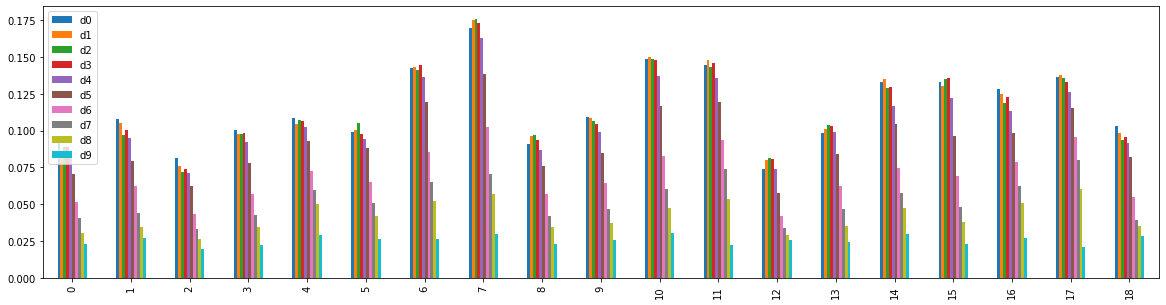

In [4]:
ps.plot(kind='bar',figsize=(20,5))

In [5]:
rev=list(ds.keys())
rev.reverse()

In [13]:
psm=ps.mean()

In [31]:
psm.index=list(range(0,-10,-1))

In [35]:
psm.to_csv('mice_mef_ips_mean.csv')